In [1]:
import pandas as pd
import numpy as np

values = pd.read_csv('../data/Columbus_Ed_astro_pi_datalog.csv.zip',parse_dates=[19])


cols = ["mag_x","mag_y","mag_z"]
magnetic = values[cols]
values["mag"] = magnetic.apply(lambda x: np.sqrt(x.dot(x)), axis=1)


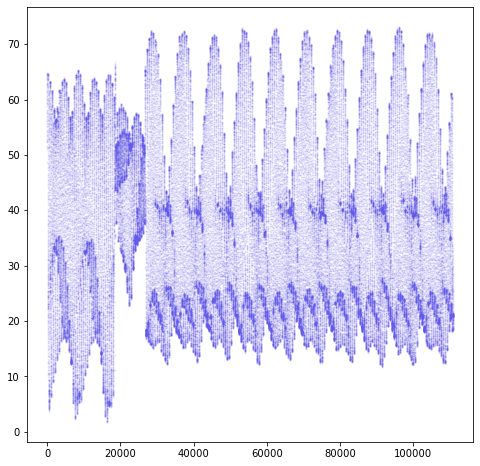

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(values["ROW_ID"], values["mag"], s=1,alpha=0.1,color="#6359EB")

In [3]:
cols = ["accel_x","accel_y","accel_z"]
accelerometer = values[cols]
values["acc"] = accelerometer.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

In [4]:
#Controllo l'accelerazione per vedere se i motori sono accesi
treshold = 1

ewmacc = values.acc.ewm(span=20).mean()
ewmacc = (ewmacc - ewmacc.mean()).abs()
values["ewmacc"] = ewmacc

(0.647676670074377, 6027.0)

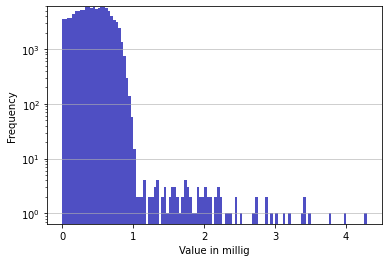

In [5]:
xmin = values["ewmacc"].min()
xmax = values["ewmacc"].max()

n_bins = int((xmax-xmin) * 1000) * 30

plt.yscale('log')

n, bins, patches = plt.hist(x=values["ewmacc"] * 1000, bins=n_bins, color='#0504aa',alpha=0.7)
plt.grid(axis='y', alpha=0.75)

plt.xlabel('Value in millig')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq) + 100)

In [6]:
treshold = 0.865
values["valid"] = (ewmacc * 1000) < treshold

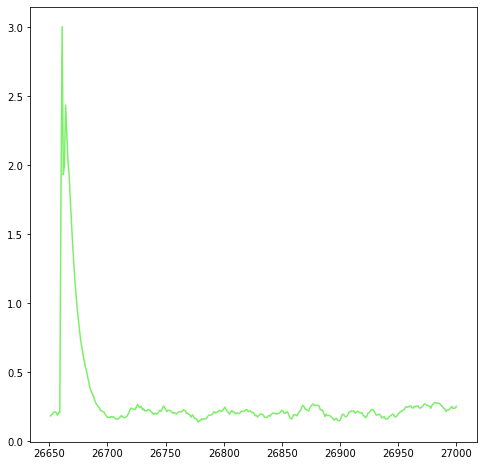

In [7]:
#minInterval = 18375
#maxInterval = 18600

minInterval = 26650
maxInterval = 27000

checkVal = values[minInterval:maxInterval]
plt.figure(figsize=(8,8))
#plt.scatter(checkVal["ROW_ID"], checkVal["mag"], s=1,alpha=0.1,color="#6359EB",label="Magnetometer")
plt.plot(checkVal["ROW_ID"], checkVal["ewmacc"] * 1000,alpha=0.8,color='#5BEB42',label="Accelerometer")

In [9]:
checkVal = values[values["valid"]]
print("percentuale elementi validi {0:.2f}%".format((len(checkVal) / len(values)) * 100))

percentuale elementi validi 98.96%


Normalizzo le misure a intervalli regolari

In [45]:
values['year'] = values.time_stamp.dt.year
values['month'] = values.time_stamp.dt.month
values['day'] = values.time_stamp.dt.day
values['hour'] = values.time_stamp.dt.hour
values['minute'] = values.time_stamp.dt.minute
values['second'] = (values.time_stamp.dt.second / 10).astype(int) * 10

newIndex = pd.to_datetime(values[['year', 'month', 'day', 'hour', 'minute', 'second']])
values['time_stamp_norm'] = newIndex

values.drop(['year','month','day','hour','minute','second'], axis=1, inplace=True)
values

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,gyro_x,gyro_y,gyro_z,reset,time_stamp,mag,acc,ewmacc,valid,time_stamp_norm
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,48.665565,0.024297,0.000767,True,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,51.145579,0.024303,0.000770,True,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,51.463433,0.024108,0.000700,True,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,51.626597,0.024159,0.000680,True,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,52.272255,0.024137,0.000662,True,2016-02-16 10:45:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21,31.570182,0.023017,0.000518,True,2016-02-29 09:24:20
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30,31.980925,0.023020,0.000517,True,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41,32.374701,0.023048,0.000514,True,2016-02-29 09:24:40
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50,32.766289,0.023087,0.000507,True,2016-02-29 09:24:50


In [104]:
validDf = values[values["valid"]].copy()
validDf["valid"] = validDf['time_stamp_norm'].diff().fillna(pd.Timedelta(seconds=0)) <= pd.Timedelta(seconds=60)

In [105]:
indexes = validDf[validDf["valid"] == False].index.values

In [125]:
minNumValues = 400
intervals = np.append([0],indexes)
extraction = []
for val in zip(intervals[:-1],intervals[1:]):
    numValues = val[1] - val[0]
    if numValues > minNumValues:
        extraction.append(val)

print(len(extraction))

19


In [126]:
extraction

[(0, 2217),
 (2227, 4105),
 (4875, 8631),
 (8631, 18437),
 (18830, 26675),
 (26675, 34643),
 (35388, 64687),
 (64687, 73247),
 (73247, 81818),
 (81818, 87120),
 (87159, 87787),
 (88236, 89291),
 (89373, 90379),
 (90379, 95794),
 (95859, 97953),
 (97953, 98941),
 (98941, 99363),
 (99374, 102587),
 (103060, 106790)]

In [127]:
for interval in extraction:
    start = interval[0]
    end = interval[1]
    startTime = validDf['time_stamp_norm'][start]
    endTime = validDf['time_stamp_norm'][end]
    days = (endTime - startTime).days
    seconds = (endTime - startTime).seconds
    print("Lunghezza intervallo {0} giorni {1} ore e {2} minuti".format(days, seconds // 3600, seconds // 60 % 60))
    

Lunghezza intervallo 0 giorni 6 ore e 12 minuti
Lunghezza intervallo 0 giorni 5 ore e 14 minuti
Lunghezza intervallo 0 giorni 10 ore e 31 minuti
Lunghezza intervallo 1 giorni 3 ore e 31 minuti
Lunghezza intervallo 0 giorni 21 ore e 57 minuti
Lunghezza intervallo 0 giorni 22 ore e 18 minuti
Lunghezza intervallo 3 giorni 10 ore e 9 minuti
Lunghezza intervallo 1 giorni 0 ore e 0 minuti
Lunghezza intervallo 1 giorni 0 ore e 0 minuti
Lunghezza intervallo 0 giorni 14 ore e 51 minuti
Lunghezza intervallo 0 giorni 1 ore e 45 minuti
Lunghezza intervallo 0 giorni 2 ore e 58 minuti
Lunghezza intervallo 0 giorni 2 ore e 49 minuti
Lunghezza intervallo 0 giorni 15 ore e 10 minuti
Lunghezza intervallo 0 giorni 5 ore e 52 minuti
Lunghezza intervallo 0 giorni 2 ore e 47 minuti
Lunghezza intervallo 0 giorni 1 ore e 10 minuti
Lunghezza intervallo 0 giorni 8 ore e 59 minuti
Lunghezza intervallo 0 giorni 10 ore e 25 minuti


6